In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("Weather_station_combined.csv")
df_uv = pd.read_csv("uv_2017_2021_cleaned.csv")

In [5]:
from pandasql import sqldf

In [6]:
mysql = lambda q: sqldf(q, globals())

In [7]:
df.drop(columns="Unnamed: 0", inplace= True)
df_uv.drop(columns="Unnamed: 0", inplace= True)

#### Generate df for test 1 (12-3pm, UV>6)

Combine UV data into weather

In [8]:
df["month"] = df["day"].apply(lambda x: x[5:7])

In [9]:
df.sort_values(by=["month", "time"])

,station_id,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude,month
0,S109,2017-01-01,00:00,26.0,90.6,0.0,2.1,24,Ang Mo Kio Avenue 5,103.84920,1.37640,01
1,S117,2017-01-01,00:00,26.9,82.1,0.0,2.2,347,Banyan Road,103.67900,1.25600,01
2,S107,2017-01-01,00:00,27.0,89.8,0.0,1.3,2,East Coast Parkway,103.96250,1.31350,01
3,S43,2017-01-01,00:00,26.9,88.1,0.0,2.2,36,Kim Chuan Road,103.88780,1.33990,01
4,S108,2017-01-01,00:00,27.0,87.3,0.0,11.5,356,Marina Gardens Drive,103.87030,1.27990,01
...,...,...,...,...,...,...,...,...,...,...,...,...
477105,S44,2021-12-31,23:00,24.1,90.2,0.0,2.0,103,Nanyang Avenue,103.68166,1.34583,12
477106,S115,2021-12-31,23:00,25.3,83.3,0.0,1.4,257,Tuas South Avenue 3,103.61843,1.29377,12
477107,S24,2021-12-31,23:00,24.6,92.3,0.0,4.8,234,Upper Changi Road North,103.98260,1.36780,12
477108,S104,2021-12-31,23:00,25.3,93.8,0.0,7.1,56,Woodlands Avenue 9,103.78538,1.44387,12


In [10]:
df.head()

,station_id,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude,month
0,S109,2017-01-01,00:00,26.0,90.6,0.0,2.1,24,Ang Mo Kio Avenue 5,103.8492,1.3764,01
1,S117,2017-01-01,00:00,26.9,82.1,0.0,2.2,347,Banyan Road,103.6790,1.2560,01
2,S107,2017-01-01,00:00,27.0,89.8,0.0,1.3,2,East Coast Parkway,103.9625,1.3135,01
3,S43,2017-01-01,00:00,26.9,88.1,0.0,2.2,36,Kim Chuan Road,103.8878,1.3399,01
4,S108,2017-01-01,00:00,27.0,87.3,0.0,11.5,356,Marina Gardens Drive,103.8703,1.2799,01


In [11]:
df_uv.head()

,UV,timestamp,time,day,month
0,0,2017-01-01T07:00:00+08:00,07:00,2017-01-01,1
1,0,2017-01-01T08:00:00+08:00,08:00,2017-01-01,1
2,1,2017-01-01T09:00:00+08:00,09:00,2017-01-01,1
3,2,2017-01-01T10:00:00+08:00,10:00,2017-01-01,1
4,5,2017-01-01T11:00:00+08:00,11:00,2017-01-01,1


In [12]:
query = '''
SELECT W.*, UV.UV
FROM df W
LEFT JOIN
df_uv UV
ON W.day = UV.day and W.time = UV.time
'''

In [13]:
df_W_UV = mysql(query)

In [14]:
df_W_UV.insert(9, "uv", df_W_UV["UV"])
df_W_UV.drop(columns="UV", inplace= True)

In [15]:
df_W_UV

,station_id,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,uv,longitude,latitude,month
0,S109,2017-01-01,00:00,26.0,90.6,0.0,2.1,24,Ang Mo Kio Avenue 5,NaN,103.84920,1.37640,01
1,S117,2017-01-01,00:00,26.9,82.1,0.0,2.2,347,Banyan Road,NaN,103.67900,1.25600,01
2,S107,2017-01-01,00:00,27.0,89.8,0.0,1.3,2,East Coast Parkway,NaN,103.96250,1.31350,01
3,S43,2017-01-01,00:00,26.9,88.1,0.0,2.2,36,Kim Chuan Road,NaN,103.88780,1.33990,01
4,S108,2017-01-01,00:00,27.0,87.3,0.0,11.5,356,Marina Gardens Drive,NaN,103.87030,1.27990,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486915,S122,2021-07-21,23:00,29.2,78.6,0.0,2.6,172,Sembawang Road,NaN,103.82490,1.41731,07
486916,S115,2021-07-21,23:00,29.5,75.3,0.0,4.3,61,Tuas South Avenue 3,NaN,103.61843,1.29377,07
486917,S24,2021-07-21,23:00,29.1,73.8,0.0,8.3,176,Upper Changi Road North,NaN,103.98260,1.36780,07
486918,S116,2021-07-21,23:00,29.3,86.7,0.0,6.3,153,West Coast Highway,NaN,103.75400,1.28100,07


In [16]:
df_W_UV.isna().sum()

station_id           0
day                  0
time                 0
air_temp             0
rel_humidity         0
rainfall             0
windspeed            0
winddir              0
name                 0
uv              238632
longitude            0
latitude             0
month                0
dtype: int64

In [17]:
df_W_UVnr = df_W_UV.loc[df_W_UV["rainfall"]==0]

In [18]:
df_S107 = df_W_UVnr.loc[df_W_UVnr["station_id"]=="S107"]
df_S108 = df_W_UVnr.loc[df_W_UVnr["station_id"]=="S108"]
df_S60 = df_W_UVnr.loc[df_W_UVnr["station_id"]=="S60"]
df_S43 = df_W_UVnr.loc[df_W_UVnr["station_id"]=="S43"]
df_S109 = df_W_UVnr.loc[df_W_UVnr["station_id"]=="S109"]

In [19]:
df_S60.insert(1, "Category", "Coastal")
df_S107.insert(1, "Category", "Coastal")
df_S108.insert(1, "Category", "Coastal")
df_S43.insert(1, "Category", "Inland")
df_S109.insert(1, "Category", "Inland")

In [20]:
df_wuv_S107 = df_S107.loc[df_S107["uv"]>=6]
df_wuv_S108 = df_S108.loc[df_S108["uv"]>=6]
df_wuv_S60 = df_S60.loc[df_S60["uv"]>=6]
df_wuv_S43 = df_S43.loc[df_S43["uv"]>=6]
df_wuv_S109 = df_S109.loc[df_S109["uv"]>=6]

In [21]:
df_wuv_S107 = df_wuv_S107.loc[(df_wuv_S107["time"]>="12:00") & (df_wuv_S107["time"]<="15:00")]
df_wuv_S108 = df_wuv_S108.loc[(df_wuv_S108["time"]>="12:00") & (df_wuv_S108["time"]<="15:00")]
df_wuv_S60 = df_wuv_S60.loc[(df_wuv_S60["time"]>="12:00") & (df_wuv_S60["time"]<="15:00")]
df_wuv_S43 = df_wuv_S43.loc[(df_wuv_S43["time"]>="12:00") & (df_wuv_S43["time"]<="15:00")]
df_wuv_S109 = df_wuv_S109.loc[(df_wuv_S109["time"]>="12:00") & (df_wuv_S109["time"]<="15:00")]

In [22]:
df_inland = pd.concat([df_wuv_S43, df_wuv_S109])
df_coastal = pd.concat([df_wuv_S60, df_wuv_S107, df_wuv_S108])
df_wuv_all = pd.concat([df_inland, df_coastal])

In [23]:
df_inland = df_inland.sort_values(by=["month", "time"])
df_coastal = df_coastal.sort_values(by=["month", "time"])
df_wuv_all = df_wuv_all.sort_values(by=["month", "time"])

In [24]:
df_inland_all = pd.concat([df_S43, df_S109])
df_coastal_all = pd.concat([df_S60, df_S107, df_S108])
df_inland_all = df_inland_all.sort_values(by=["month", "time"])
df_coastal_all = df_coastal_all.sort_values(by=["month", "time"])

In [25]:
hotmth = ["05", "06", "07", "08"]
coolmth = ["01", "02", "11", "12"]

In [26]:
df_wuv_S60_hot = df_wuv_S60[df_wuv_S60["month"].isin(hotmth)]
df_wuv_S107_hot = df_wuv_S107[df_wuv_S107["month"].isin(hotmth)]
df_wuv_S108_hot = df_wuv_S108[df_wuv_S108["month"].isin(hotmth)]
df_inland_hot = df_inland[df_inland["month"].isin(hotmth)]
df_coastal_hot = df_coastal[df_coastal["month"].isin(hotmth)]

In [27]:
df_wuv_S60_cool = df_wuv_S60[df_wuv_S60["month"].isin(coolmth)]
df_wuv_S107_cool = df_wuv_S107[df_wuv_S107["month"].isin(coolmth)]
df_wuv_S108_cool = df_wuv_S108[df_wuv_S108["month"].isin(coolmth)]
df_inland_cool = df_inland[df_inland["month"].isin(coolmth)]
df_coastal_cool = df_coastal[df_coastal["month"].isin(coolmth)]

In [28]:
df_wuv_all_hot = pd.concat([df_inland_hot, df_coastal_hot])
df_wuv_all_cool = pd.concat([df_inland_cool, df_coastal_cool])

Text(0.5, 1.0, 'Temperature over time (all data)')

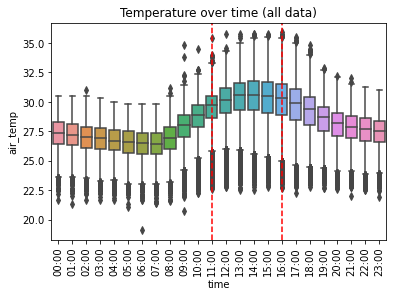

In [29]:
sns.boxplot(data = df_W_UVnr, x="time", y="air_temp")
plt.xticks(rotation=90)
plt.axvline(11, color="red", linestyle="dashed")
plt.axvline(16, color="red", linestyle="dashed")
plt.title("Temperature over time (all data)")

#### Generate df for test 2 (8-10pm, no rain)

In [30]:
df_nr = df.loc[df["rainfall"]==0]

In [31]:
df_S60nr = df_nr.loc[df_nr["station_id"]=="S60"]
df_S107nr = df_nr.loc[df_nr["station_id"]=="S107"]
df_S108nr = df_nr.loc[df_nr["station_id"]=="S108"]
df_S43nr = df_nr.loc[df_nr["station_id"]=="S43"]
df_S109nr = df_nr.loc[df_nr["station_id"]=="S109"]

In [32]:
df_S60nr.insert(1, "Category", "Coastal")
df_S107nr.insert(1, "Category", "Coastal")
df_S108nr.insert(1, "Category", "Coastal")
df_S43nr.insert(1, "Category", "Inland")
df_S109nr.insert(1, "Category", "Inland")

In [33]:
df_eve_S60 = df_S60nr.loc[(df_S60nr["time"]>="20:00") & (df_S60nr["time"]<="23:00")].reset_index()
df_eve_S107 = df_S107nr.loc[(df_S107nr["time"]>="20:00") & (df_S107nr["time"]<="23:00")].reset_index()
df_eve_S108 = df_S108nr.loc[(df_S108nr["time"]>="20:00") & (df_S108nr["time"]<="23:00")].reset_index()
df_eve_S43 = df_S43nr.loc[(df_S43nr["time"]>="20:00") & (df_S43nr["time"]<="23:00")].reset_index()
df_eve_S109 = df_S109nr.loc[(df_S109nr["time"]>="20:00") & (df_S109nr["time"]<="23:00")].reset_index()

In [34]:
df_eve_S60.drop(columns="index", inplace= True)
df_eve_S107.drop(columns="index", inplace= True)
df_eve_S108.drop(columns="index", inplace= True)
df_eve_S43.drop(columns="index", inplace= True)
df_eve_S109.drop(columns="index", inplace= True)

In [35]:
df_eve_inland = pd.concat([df_eve_S43, df_eve_S109])
df_eve_coastal = pd.concat([df_eve_S60, df_eve_S107, df_eve_S108])
df_eve_inland = df_eve_inland.sort_values(by=['month', 'time'])
df_eve_coastal = df_eve_coastal.sort_values(by=['month', 'time'])

In [36]:
df_eve_S60_hot = df_eve_S60[df_eve_S60["month"].isin(hotmth)]
df_eve_S107_hot = df_eve_S107[df_eve_S107["month"].isin(hotmth)]
df_eve_S108_hot = df_eve_S108[df_eve_S108["month"].isin(hotmth)]
df_eve_inland_hot = df_eve_inland[df_eve_inland["month"].isin(hotmth)]
df_eve_coastal_hot = df_eve_coastal[df_eve_coastal["month"].isin(hotmth)]

In [37]:
df_eve_S60_cool = df_eve_S60[df_eve_S60["month"].isin(coolmth)]
df_eve_S107_cool = df_eve_S107[df_eve_S107["month"].isin(coolmth)]
df_eve_S108_cool = df_eve_S108[df_eve_S108["month"].isin(coolmth)]
df_eve_inland_cool = df_eve_inland[df_eve_inland["month"].isin(coolmth)]
df_eve_coastal_cool = df_eve_coastal[df_eve_coastal["month"].isin(coolmth)]

In [38]:
df_eve_all_hot = pd.concat([df_eve_inland_hot, df_eve_coastal_hot])
df_eve_all_cool = pd.concat([df_eve_inland_cool, df_eve_coastal_cool])

#### Generate df for test 3 (12am-6am, no rain)

In [39]:
df_night_S107 = df_S107nr.loc[(df_S107nr["time"]>="00:00") & (df_S107nr["time"]<="06:00")].reset_index()
df_night_S108 = df_S108nr.loc[(df_S108nr["time"]>="00:00") & (df_S108nr["time"]<="06:00")].reset_index()
df_night_S60 = df_S60nr.loc[(df_S60nr["time"]>="00:00") & (df_S60nr["time"]<="06:00")].reset_index()
df_night_S43 = df_S43nr.loc[(df_S43nr["time"]>="00:00") & (df_S43nr["time"]<="06:00")].reset_index()
df_night_S109 = df_S109nr.loc[(df_S109nr["time"]>="00:00") & (df_S109nr["time"]<="06:00")].reset_index()

In [40]:
df_night_S60.drop(columns="index", inplace= True)
df_night_S107.drop(columns="index", inplace= True)
df_night_S108.drop(columns="index", inplace= True)
df_night_S43.drop(columns="index", inplace= True)
df_night_S109.drop(columns="index", inplace= True)

In [41]:
df_night_inland = pd.concat([df_night_S43, df_night_S109])
df_night_coastal = pd.concat([df_night_S60, df_night_S107, df_night_S108])
df_night_inland = df_night_inland.sort_values(by=['month', 'time'])
df_night_coastal = df_night_coastal.sort_values(by=['month', 'time'])

In [42]:
df_night_S60_hot = df_night_S60[df_night_S60["month"].isin(hotmth)]
df_night_S107_hot = df_night_S107[df_night_S107["month"].isin(hotmth)]
df_night_S108_hot = df_night_S108[df_night_S108["month"].isin(hotmth)]
df_night_inland_hot = df_night_inland[df_night_inland["month"].isin(hotmth)]
df_night_coastal_hot = df_night_coastal[df_night_coastal["month"].isin(hotmth)]

In [43]:
df_night_S60_cool = df_night_S60[df_night_S60["month"].isin(coolmth)]
df_night_S107_cool = df_night_S107[df_night_S107["month"].isin(coolmth)]
df_night_S108_cool = df_night_S108[df_night_S108["month"].isin(coolmth)]
df_night_inland_cool = df_night_inland[df_night_inland["month"].isin(coolmth)]
df_night_coastal_cool = df_night_coastal[df_night_coastal["month"].isin(coolmth)]

In [44]:
df_night_all_hot = pd.concat([df_night_inland_hot, df_night_coastal_hot])
df_night_all_cool = pd.concat([df_night_inland_cool, df_night_coastal_cool])

In [45]:
df_night_inland

,station_id,Category,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude,month
0,S43,Inland,2017-01-01,00:00,26.9,88.1,0.0,2.2,36,Kim Chuan Road,103.8878,1.3399,01
7,S43,Inland,2017-01-02,00:00,27.5,84.4,0.0,4.7,42,Kim Chuan Road,103.8878,1.3399,01
14,S43,Inland,2017-01-03,00:00,26.0,90.4,0.0,1.4,82,Kim Chuan Road,103.8878,1.3399,01
21,S43,Inland,2017-01-04,00:00,26.2,84.8,0.0,6.2,33,Kim Chuan Road,103.8878,1.3399,01
28,S43,Inland,2017-01-05,00:00,26.9,86.7,0.0,2.9,58,Kim Chuan Road,103.8878,1.3399,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8348,S109,Inland,2021-12-24,06:00,25.9,89.9,0.0,2.1,65,Ang Mo Kio Avenue 5,103.8492,1.3764,12
8355,S109,Inland,2021-12-28,06:00,25.4,83.9,0.0,2.6,30,Ang Mo Kio Avenue 5,103.8492,1.3764,12
8362,S109,Inland,2021-12-29,06:00,25.8,83.3,0.0,2.5,30,Ang Mo Kio Avenue 5,103.8492,1.3764,12
8369,S109,Inland,2021-12-30,06:00,25.7,87.9,0.0,1.3,15,Ang Mo Kio Avenue 5,103.8492,1.3764,12


## Overview

Text(0.5, 1.0, 'Compare inland stations (all data)')

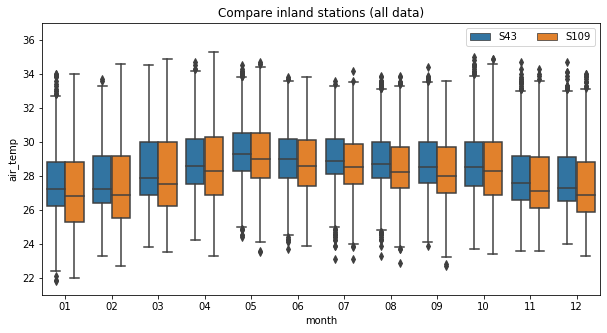

In [46]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_inland_all, hue="station_id", x="month", y="air_temp")
ax.set_ylim(21, 37)
plt.legend(loc="upper right", ncol=2)
#plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower right")
plt.title("Compare inland stations (all data)")

Text(0.5, 1.0, 'Compare inland stations (all data)')

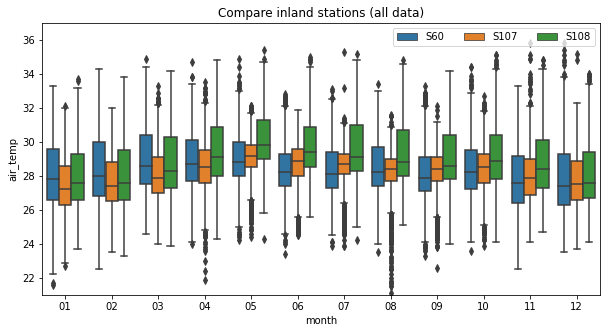

In [47]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_coastal_all, hue="station_id", x="month", y="air_temp")
ax.set_ylim(21, 37)
plt.legend(loc="upper right", ncol=3)
#plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower right", ncol=3)
plt.title("Compare inland stations (all data)")

Text(0.5, 1.0, 'Compare inland stations (between 12pm-3pm, UV index > 6, no rain)')

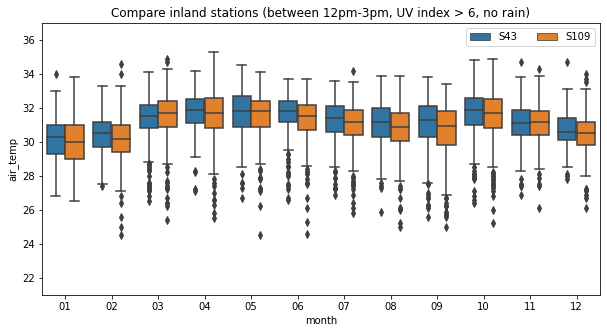

In [48]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_inland, hue="station_id", x="month", y="air_temp")
ax.set_ylim(21, 37)
plt.legend(loc="upper right", ncol=2)
plt.title("Compare inland stations (between 12pm-3pm, UV index > 6, no rain)")

Text(0.5, 1.0, 'Compare coastal stations (between 12pm-3pm, UV index > 6, no rain)')

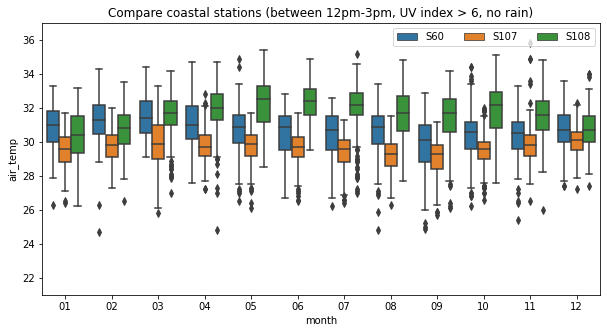

In [49]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_coastal, hue="station_id", x="month", y="air_temp")
ax.set_ylim(21, 37)
plt.legend(loc="upper right", ncol=3)
plt.title("Compare coastal stations (between 12pm-3pm, UV index > 6, no rain)")

Text(0.5, 1.0, 'Compare inland stations (evening)')

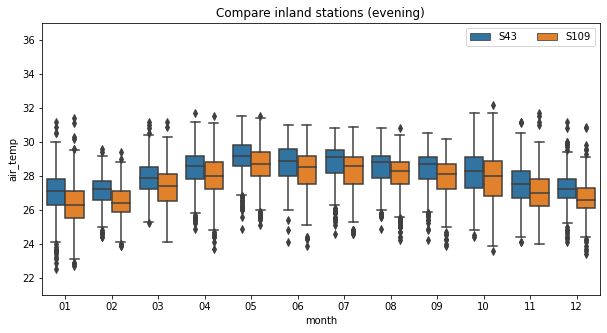

In [50]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_eve_inland, hue="station_id", x="month", y="air_temp")
ax.set_ylim(21, 37)
plt.legend(loc="upper right", ncol=2)
plt.title("Compare inland stations (evening)")

Text(0.5, 1.0, 'Compare coastal stations (evening)')

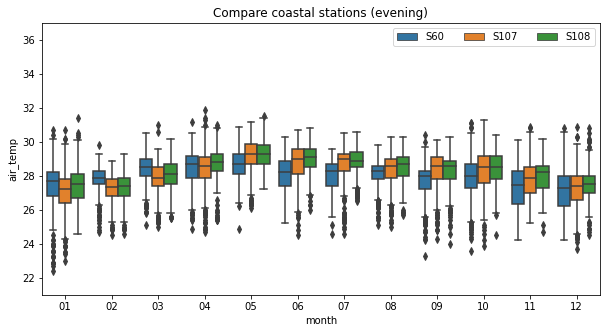

In [51]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_eve_coastal, hue="station_id", x="month", y="air_temp")
ax.set_ylim(21, 37)
plt.legend(loc="upper right", ncol=3)
plt.title("Compare coastal stations (evening)")

Text(0.5, 1.0, 'Compare inland stations (night)')

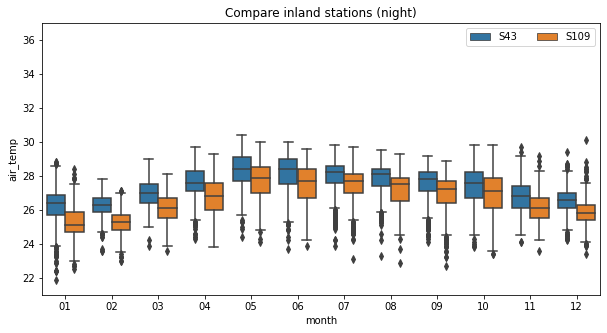

In [52]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_night_inland, hue="station_id", x="month", y="air_temp")
ax.set_ylim(21, 37)
plt.legend(loc="upper right", ncol=2)
plt.title("Compare inland stations (night)")

Text(0.5, 1.0, 'Compare coastal stations (night)')

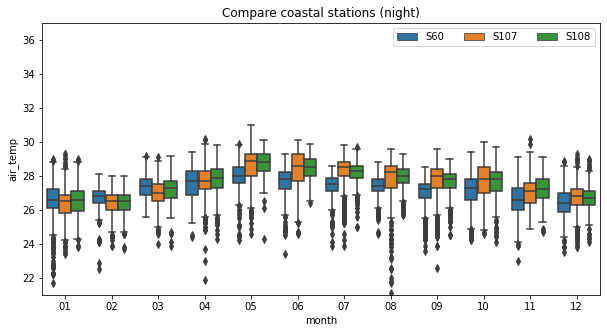

In [53]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_night_coastal, hue="station_id", x="month", y="air_temp")
ax.set_ylim(21, 37)
plt.legend(loc="upper right", ncol=3)
plt.title("Compare coastal stations (night)")

In [54]:
from scipy.stats import shapiro
import scipy.stats as stats
import pylab
from scipy.stats import median_test

### 12pm to 3pm, UV>6, no rain

#### Check Normality

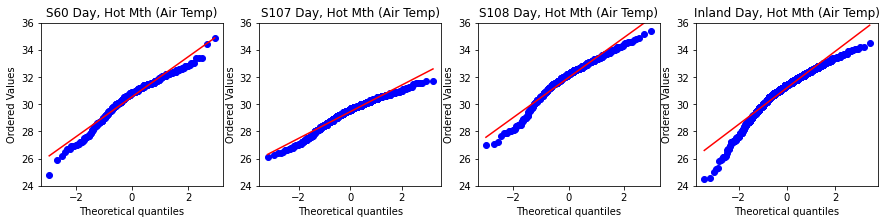

In [57]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharex= True, sharey= True, figsize=(15,3))
ax1 = plt.subplot(141)
ax1 = stats.probplot(df_wuv_S60_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S60 Day, Hot Mth (Air Temp)")
plt.ylim(24,36)
ax2 = plt.subplot(142)
ax2 = stats.probplot(df_wuv_S107_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S107 Day, Hot Mth (Air Temp)")
plt.ylim(24,36)
ax3 = plt.subplot(143)
ax3 = stats.probplot(df_wuv_S108_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S108 Day, Hot Mth (Air Temp)")
plt.ylim(24,36)
ax4 = plt.subplot(144)
ax4 = stats.probplot(df_inland_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("Inland Day, Hot Mth (Air Temp)")
plt.ylim(24,36)
plt.show()

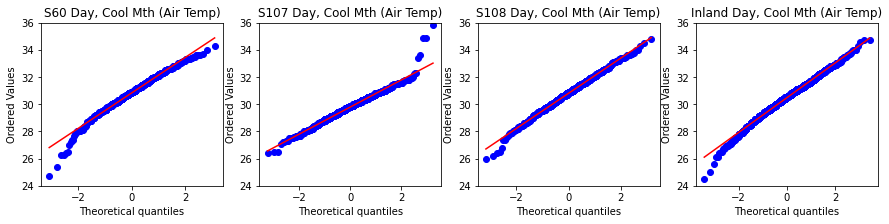

In [58]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,3))
ax1 = plt.subplot(141)
ax1 = stats.probplot(df_wuv_S60_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S60 Day, Cool Mth (Air Temp)")
plt.ylim(24,36)
ax2 = plt.subplot(142)
ax2 = stats.probplot(df_wuv_S107_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S107 Day, Cool Mth (Air Temp)")
plt.ylim(24,36)
ax3 = plt.subplot(143)
ax3 = stats.probplot(df_wuv_S108_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S108 Day, Cool Mth (Air Temp)")
plt.ylim(24,36)
ax4 = plt.subplot(144)
ax4 = stats.probplot(df_inland_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("Inland Day, Cool Mth (Air Temp)")
plt.ylim(24,36)
plt.show()

#### Check stats

In [779]:
quant = [0.1, 0.25, 0.5, 0.75, 0.9]

In [777]:
df_coastal_hot["location"] = df_coastal_hot["station_id"]
df_inland_hot["location"] = df_inland_hot["Category"]
df_day_hot = pd.concat([df_coastal_hot, df_inland_hot])

<ipython-input-777-60fefe73af64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coastal_hot["location"] = df_coastal_hot["station_id"]
<ipython-input-777-60fefe73af64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inland_hot["location"] = df_inland_hot["Category"]


In [780]:
round(df_day_hot.groupby("location").air_temp.describe(percentiles=quant),2)

,count,mean,std,min,10%,25%,50%,75%,90%,max
location,,,,,,,,,,
Inland,2162.0,31.21,1.38,24.5,29.40,30.50,31.4,32.1,32.7,34.5
S107,1048.0,29.45,0.99,26.1,28.10,28.90,29.6,30.2,30.6,31.7
S108,502.0,31.97,1.50,27.0,29.91,31.22,32.2,33.0,33.6,35.4
S60,436.0,30.54,1.49,24.8,28.50,29.78,30.8,31.5,32.2,34.9


In [781]:
df_coastal_cool["location"] = df_coastal_cool["station_id"]
df_inland_cool["location"] = df_inland_cool["Category"]
df_day_cool = pd.concat([df_coastal_cool, df_inland_cool])

<ipython-input-781-ff632b521602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coastal_cool["location"] = df_coastal_cool["station_id"]
<ipython-input-781-ff632b521602>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inland_cool["location"] = df_inland_cool["Category"]


In [782]:
round(df_day_cool.groupby("location").air_temp.describe(percentiles=quant),2)

,count,mean,std,min,10%,25%,50%,75%,90%,max
location,,,,,,,,,,
Inland,2244.0,30.49,1.28,24.5,28.90,29.7,30.5,31.3,32.1,34.7
S107,1199.0,29.80,1.00,26.4,28.50,29.1,29.9,30.4,31.0,35.8
S108,898.0,30.81,1.29,26.0,29.20,30.0,30.8,31.7,32.4,34.8
S60,704.0,30.85,1.31,24.7,29.23,30.1,30.9,31.7,32.5,34.3


#### Plot distribution

Text(0.5, 1.0, 'S60 vs inland (between 12pm-3pm, UV index > 6, no rain, hot mth)')

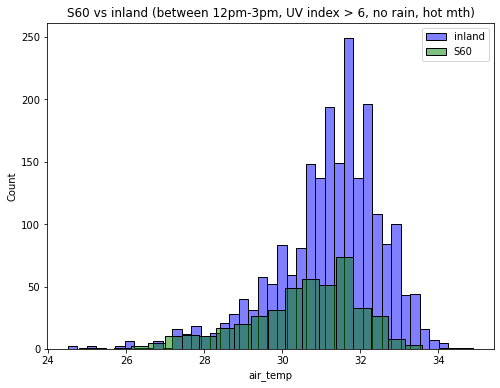

In [642]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_inland_hot["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_wuv_S60_hot["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S60"])
plt.title("S60 vs inland (between 12pm-3pm, UV index > 6, no rain, hot mth)")

Text(0.5, 1.0, 'S107 vs inland (between 12pm-3pm, UV index > 6, no rain, hot mth)')

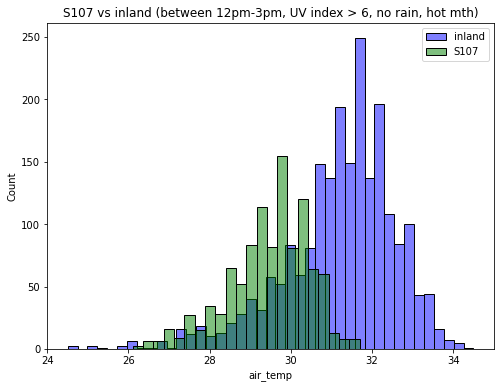

In [643]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_inland_hot["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_wuv_S107_hot["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S107"])
plt.title("S107 vs inland (between 12pm-3pm, UV index > 6, no rain, hot mth)")

Text(0.5, 1.0, 'S108 vs inland (between 12pm-3pm, UV index > 6, no rain, hot mth)')

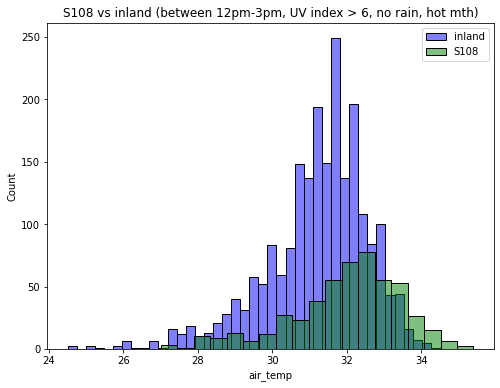

In [644]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_inland_hot["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_wuv_S108_hot["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S108"])
plt.title("S108 vs inland (between 12pm-3pm, UV index > 6, no rain, hot mth)")

Text(0.5, 1.0, 'S60 vs inland (between 12pm-3pm, UV index > 6, no rain, cool mth)')

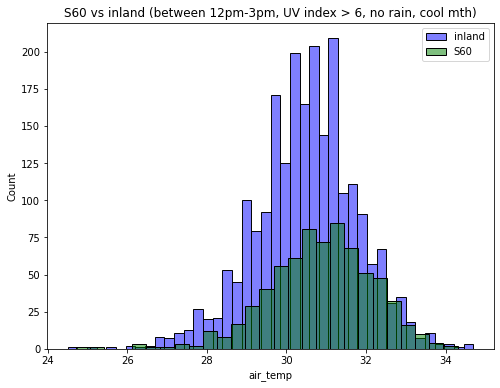

In [645]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_inland_cool["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_wuv_S60_cool["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S60"])
plt.title("S60 vs inland (between 12pm-3pm, UV index > 6, no rain, cool mth)")

Text(0.5, 1.0, 'S107 vs inland (between 12pm-3pm, UV index > 6, no rain, cool mth)')

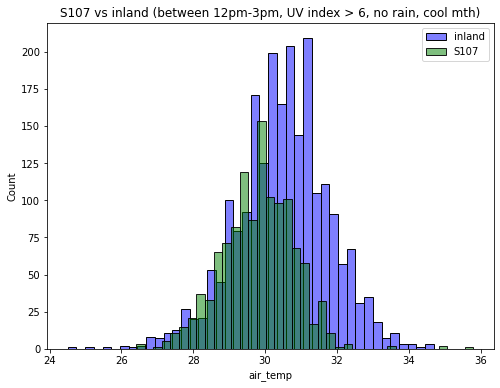

In [646]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_inland_cool["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_wuv_S107_cool["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S107"])
plt.title("S107 vs inland (between 12pm-3pm, UV index > 6, no rain, cool mth)")

Text(0.5, 1.0, 'S108 vs inland (between 12pm-3pm, UV index > 6, no rain, cool mth)')

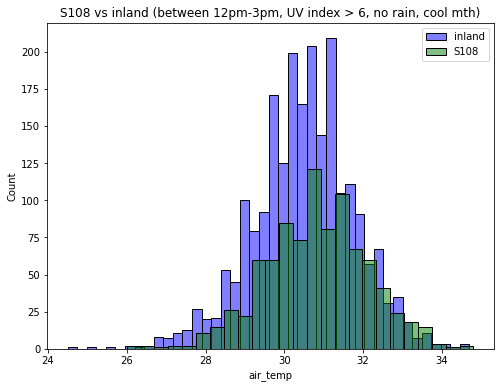

In [647]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_inland_cool["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_wuv_S108_cool["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S108"])
plt.title("S108 vs inland (between 12pm-3pm, UV index > 6, no rain, cool mth)")

#### Stat test

In [648]:
stat, p, med, tbl = median_test(df_wuv_S60_hot['air_temp'], df_inland_hot['air_temp'])
print("Stat_S60: ", stat)
print("p_S60: ", p)
print("grand median: ", med)
print("Contingency table (Hot mth):\n   S60  inland\n", tbl)

Stat_S60:  52.722750839771614
p_S60:  3.841157472333863e-13
grand median:  31.3
Contingency table (Hot mth):
   S60  inland
 [[ 146 1139]
 [ 290 1023]]


In [649]:
stat, p, med, tbl = median_test(df_wuv_S107_hot['air_temp'], df_inland_hot['air_temp'])
print("Stat_S107: ", stat)
print("p_S107: ", p)
print("grand median: ", med)
print("Contingency table (Hot mth):\n   S107 inland\n", tbl)

Stat_S107:  1164.59356443009
p_S107:  3.021352551767507e-255
grand median:  30.7
Contingency table (Hot mth):
   S107 inland
 [[  64 1522]
 [ 984  640]]


In [650]:
stat, p, med, tbl = median_test(df_wuv_S108_hot['air_temp'], df_inland_hot['air_temp'])
print("Stat_S108: ", stat)
print("p_S108: ", p)
print("grand median: ", med)
print("Contingency table (Hot mth):\n   S108 inland\n", tbl)

Stat_S108:  92.44897438185944
p_S108:  6.908318675107011e-22
grand median:  31.6
Contingency table (Hot mth):
   S108 inland
 [[ 330  905]
 [ 172 1257]]


In [674]:
stat, p, med, tbl = median_test(df_wuv_S60_cool['air_temp'], df_inland_cool['air_temp'])
print("Stat_S60: ", stat)
print("p_S60: ", p)
print("grand median: ", med)
print("Contingency table (Cool mth):\n   S60  inland\n", tbl)

Stat_S60:  32.90728108298082
p_S60:  9.666056581043707e-09
grand median:  30.6
Contingency table (Cool mth):
   S60  inland
 [[ 411 1030]
 [ 293 1214]]


In [677]:
stat, p, med, tbl = median_test(df_wuv_S107_cool['air_temp'], df_inland_cool['air_temp'])
print("Stat_S107: ", stat)
print("p_S107: ", p)
print("grand median: ", med)
print("Contingency table (Cool mth):\n   S107 inland\n", tbl)

Stat_S107:  251.31419107501165
p_S107:  1.3425705602880172e-56
grand median:  30.3
Contingency table (Cool mth):
   S107 inland
 [[ 336 1265]
 [ 863  979]]


In [678]:
stat, p, med, tbl = median_test(df_wuv_S108_cool['air_temp'], df_inland_cool['air_temp'])
print("Stat_S108: ", stat)
print("p_S108: ", p)
print("grand median: ", med)
print("Contingency table (Cool mth):\n   S108 inland\n", tbl)

Stat_S108:  24.716932489145126
p_S108:  6.639826004838865e-07
grand median:  30.6
Contingency table (Cool mth):
   S108 inland
 [[ 501 1030]
 [ 397 1214]]


#### Check other parameters

In [427]:
r_inland, p_inland = stats.pearsonr(df_inland['air_temp'], df_inland['rel_humidity']) 
r_coastal, p_coastal = stats.pearsonr(df_coastal['air_temp'], df_coastal['rel_humidity']) 
print("Correlation coeff (inland): %.3f" %r_inland)
print("Correlation coeff (coastal): %.3f" %r_coastal)

Correlation coeff (inland): -0.798
Correlation coeff (coastal): -0.722


In [338]:
df_wuv_all_nr = df_wuv_all_hot.loc[df_wuv_all["rainfall"]==0]

In [713]:
df_wuv_all_hot_long = pd.melt(df_wuv_all_hot, id_vars=["time", "Category", "rel_humidity", "station_id", "windspeed", "rainfall"])
df_wuv_all_cool_long = pd.melt(df_wuv_all_cool, id_vars=["time", "Category", "rel_humidity", "station_id", "windspeed", "rainfall"])

Text(0.5, 1.0, 'Rel humidity (between 12pm-3pm, UV index > 6, no rain, cool mth)')

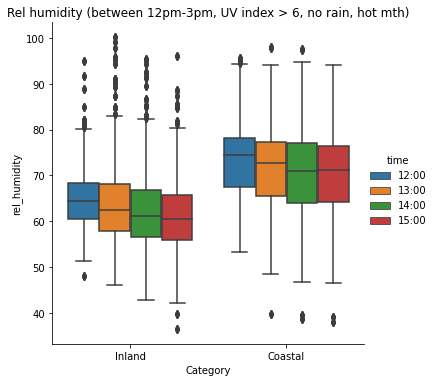

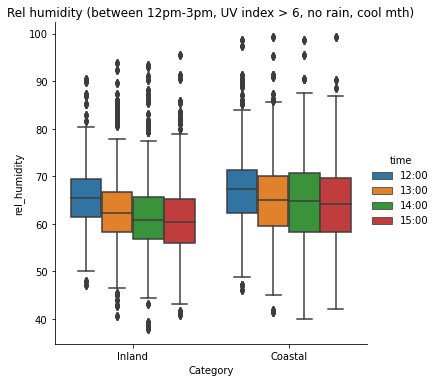

In [727]:
ax1 = sns.catplot(data = df_wuv_all_hot_long, hue="time", x="Category", y="rel_humidity", kind="box", legend=True)
plt.title("Rel humidity (between 12pm-3pm, UV index > 6, no rain, hot mth)")
ax2 = sns.catplot(data = df_wuv_all_cool_long, hue="time", x="Category", y="rel_humidity", kind="box", legend=True)
plt.title("Rel humidity (between 12pm-3pm, UV index > 6, no rain, cool mth)")

Text(0.5, 1.0, 'Wind speed (between 12pm-3pm, UV index > 6, no rain, cool mth)')

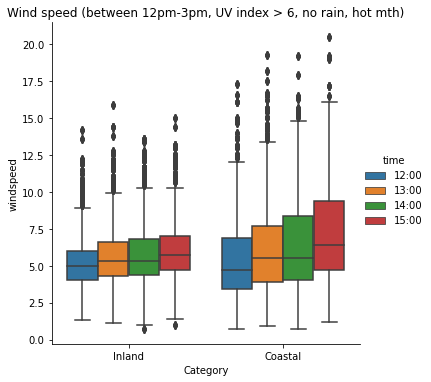

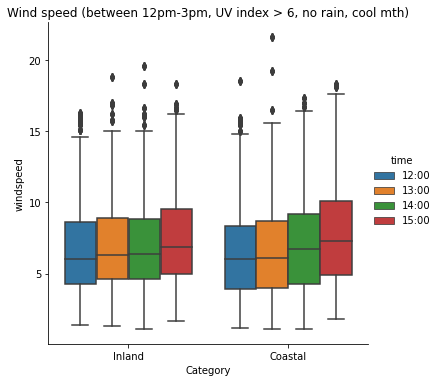

In [729]:
ax1 = sns.catplot(data = df_wuv_all_hot_long, hue="time", x="Category", y="windspeed", kind="box", legend=True)
plt.title("Wind speed (between 12pm-3pm, UV index > 6, no rain, hot mth)")
ax2 = sns.catplot(data = df_wuv_all_cool_long, hue="time", x="Category", y="windspeed", kind="box", legend=True)
plt.title("Wind speed (between 12pm-3pm, UV index > 6, no rain, cool mth)")

### 8pm to 11pm, exclude rainy days 

Text(0.5, 1.0, 'Compare inland stations (evening)')

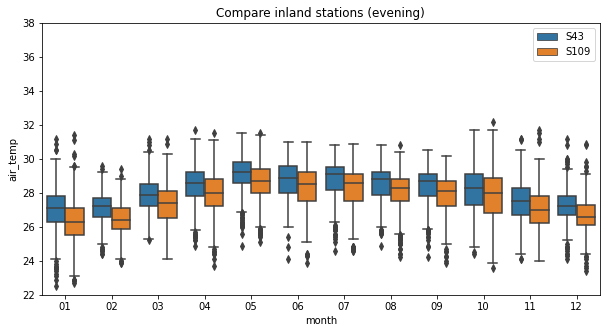

In [653]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_eve_inland, hue="station_id", x="month", y="air_temp")
ax.set_ylim(22, 38)
plt.legend(loc="upper right")
plt.title("Compare inland stations (evening)")

Text(0.5, 1.0, 'Compare coastal stations (evening)')

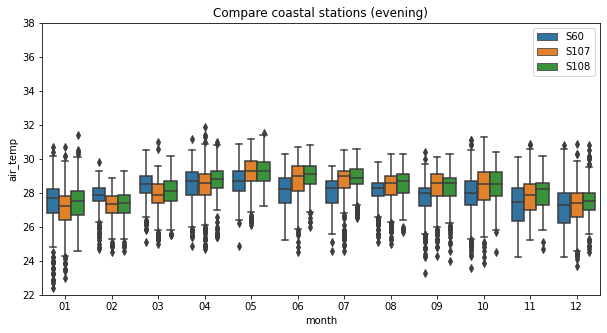

In [654]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_eve_coastal, hue="station_id", x="month", y="air_temp")
ax.set_ylim(22, 38)
plt.legend(loc="upper right")
plt.title("Compare coastal stations (evening)")

#### Check Normality

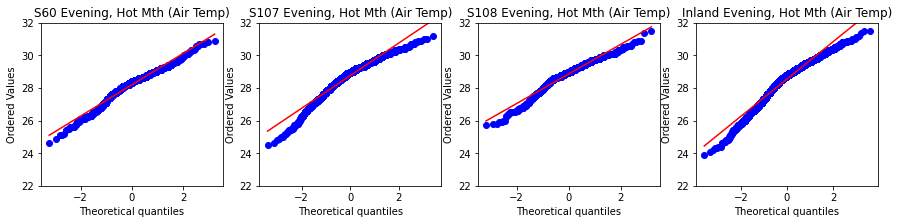

In [65]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharex= True, sharey= True, figsize=(15,3))
ax1 = plt.subplot(141)
ax1 = stats.probplot(df_eve_S60_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S60 Evening, Hot Mth (Air Temp)")
plt.ylim(22,32)
ax2 = plt.subplot(142)
ax2 = stats.probplot(df_eve_S107_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S107 Evening, Hot Mth (Air Temp)")
plt.ylim(22,32)
ax3 = plt.subplot(143)
ax3 = stats.probplot(df_eve_S108_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S108 Evening, Hot Mth (Air Temp)")
plt.ylim(22,32)
ax4 = plt.subplot(144)
ax4 = stats.probplot(df_eve_inland_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("Inland Evening, Hot Mth (Air Temp)")
plt.ylim(22,32)
plt.show()

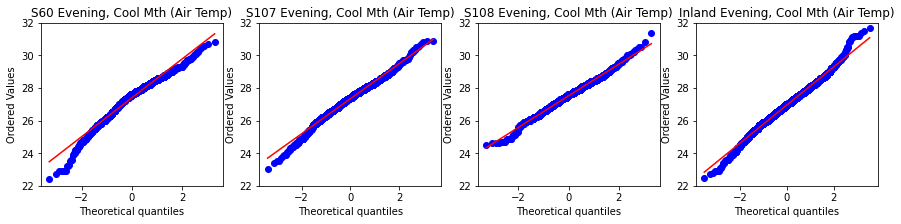

In [66]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharex= True, sharey= True, figsize=(15,3))
ax1 = plt.subplot(141)
ax1 = stats.probplot(df_eve_S60_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S60 Evening, Cool Mth (Air Temp)")
plt.ylim(22,32)
ax2 = plt.subplot(142)
ax2 = stats.probplot(df_eve_S107_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S107 Evening, Cool Mth (Air Temp)")
plt.ylim(22,32)
ax3 = plt.subplot(143)
ax3 = stats.probplot(df_eve_S108_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S108 Evening, Cool Mth (Air Temp)")
plt.ylim(22,32)
ax4 = plt.subplot(144)
ax4 = stats.probplot(df_eve_inland_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("Inland Evening, Cool Mth (Air Temp)")
plt.ylim(22,32)
plt.show()

#### Check stats

In [783]:
df_eve_coastal_hot["location"] = df_eve_coastal_hot["station_id"]
df_eve_inland_hot["location"] = df_eve_inland_hot["Category"]
df_eve_hot = pd.concat([df_eve_coastal_hot, df_eve_inland_hot])

<ipython-input-783-e3ae434dcc26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eve_coastal_hot["location"] = df_eve_coastal_hot["station_id"]
<ipython-input-783-e3ae434dcc26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eve_inland_hot["location"] = df_eve_inland_hot["Category"]


In [784]:
round(df_eve_hot.groupby("location").air_temp.describe(percentiles=quant),2)

,count,mean,std,min,10%,25%,50%,75%,90%,max
location,,,,,,,,,,
Inland,4146.0,28.55,1.16,23.9,26.9,27.9,28.8,29.4,29.8,31.5
S107,2126.0,28.76,1.02,24.5,27.3,28.2,29.0,29.4,29.9,31.2
S108,936.0,28.86,0.92,25.7,27.5,28.4,29.0,29.5,29.9,31.5
S60,1111.0,28.20,0.97,24.6,26.7,27.7,28.4,28.8,29.3,30.9


In [785]:
df_eve_coastal_cool["location"] = df_eve_coastal_cool["station_id"]
df_eve_inland_cool["location"] = df_eve_inland_cool["Category"]
df_eve_cool = pd.concat([df_eve_coastal_cool, df_eve_inland_cool])

<ipython-input-785-56f71a20b051>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eve_coastal_cool["location"] = df_eve_coastal_cool["station_id"]
<ipython-input-785-56f71a20b051>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eve_inland_cool["location"] = df_eve_inland_cool["Category"]


In [787]:
round(df_eve_cool.groupby("location").air_temp.describe(percentiles=quant),2)

,count,mean,std,min,10%,25%,50%,75%,90%,max
location,,,,,,,,,,
Inland,3593.0,26.96,1.16,22.5,25.5,26.2,27.0,27.7,28.3,31.7
S107,2002.0,27.34,1.08,23.0,26.0,26.7,27.4,28.0,28.6,30.9
S108,1410.0,27.52,0.97,24.5,26.2,26.9,27.6,28.2,28.7,31.4
S60,1352.0,27.40,1.21,22.4,25.8,26.7,27.6,28.2,28.7,30.8


#### Plot distribution

Text(0.5, 1.0, 'S60 vs inland (between 8pm-11pm, no rain, hot mth)')

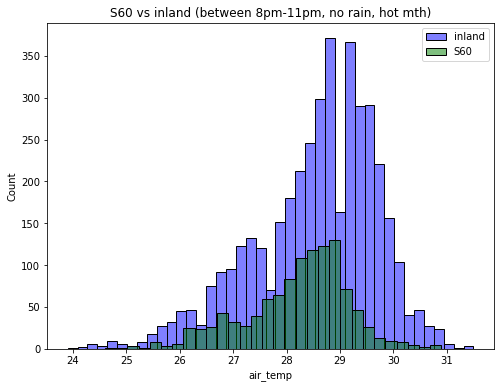

In [669]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_eve_inland_hot["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_eve_S60_hot["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S60"])
plt.title("S60 vs inland (between 8pm-11pm, no rain, hot mth)")

Text(0.5, 1.0, 'S107 vs inland (between 8pm-11pm, no rain, hot mth)')

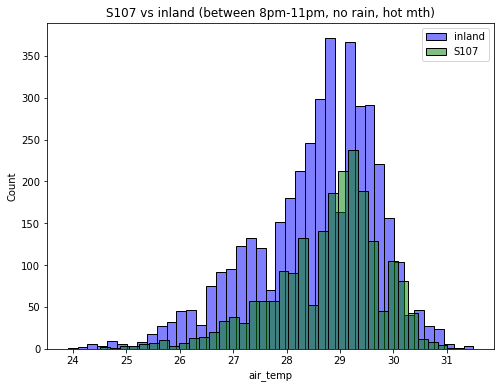

In [667]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_eve_inland_hot["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_eve_S107_hot["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S107"])
plt.title("S107 vs inland (between 8pm-11pm, no rain, hot mth)")

Text(0.5, 1.0, 'S108 vs inland (between 8pm-11pm, no rain, hot mth)')

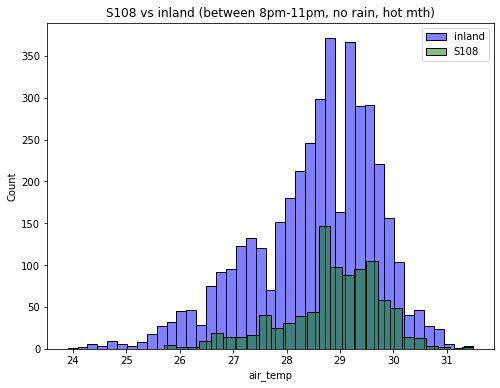

In [668]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_eve_inland_hot["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_eve_S108_hot["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S108"])
plt.title("S108 vs inland (between 8pm-11pm, no rain, hot mth)")

Text(0.5, 1.0, 'S60 vs inland (between 8pm-11pm, no rain, cool mth)')

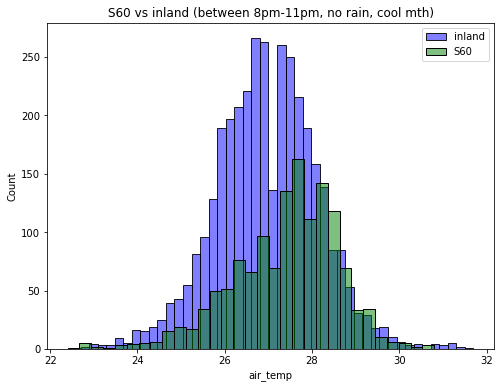

In [670]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_eve_inland_cool["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_eve_S60_cool["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S60"])
plt.title("S60 vs inland (between 8pm-11pm, no rain, cool mth)")

Text(0.5, 1.0, 'S107 vs inland (between 8pm-11pm, no rain, cool mth)')

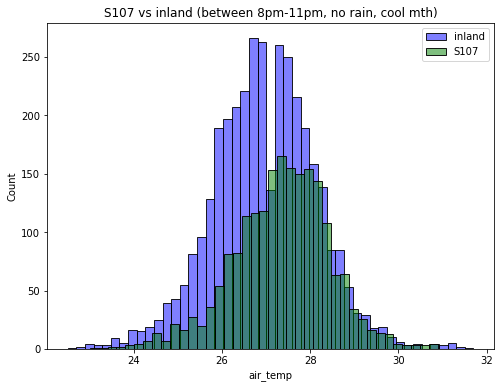

In [671]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_eve_inland_cool["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_eve_S107_cool["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S107"])
plt.title("S107 vs inland (between 8pm-11pm, no rain, cool mth)")

Text(0.5, 1.0, 'S108 vs inland (between 8pm-11pm, no rain, cool mth)')

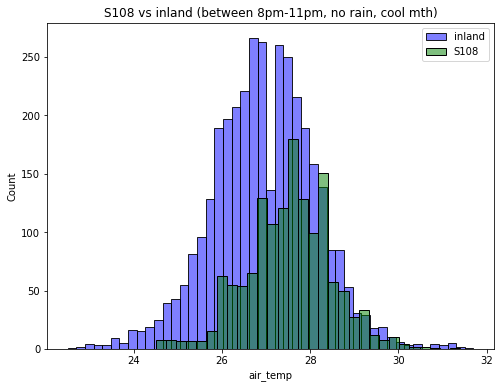

In [672]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_eve_inland_cool["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_eve_S108_cool["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S108"])
plt.title("S108 vs inland (between 8pm-11pm, no rain, cool mth)")

#### Stat test

In [673]:
stat, p, med, tbl = median_test(df_eve_S60_hot['air_temp'], df_eve_inland_hot['air_temp'])
print("Stat_S60: ", stat)
print("p_S60: ", p)
print("grand median: ", med)
print("Contingency table (Hot mth):\n   S60  inland\n", tbl)

Stat_S60:  176.09966980851226
p_S60:  3.444064227149739e-40
grand median:  28.7
Contingency table:
   S60  inland
 [[ 317 2112]
 [ 794 2034]]


In [679]:
stat, p, med, tbl = median_test(df_eve_S107_hot['air_temp'], df_eve_inland_hot['air_temp'])
print("Stat_S107: ", stat)
print("p_S107: ", p)
print("grand median: ", med)
print("Contingency table (Hot mth):\n   S107 inland\n", tbl)

Stat_S107:  40.15981821345178
p_S107:  2.3401240338640576e-10
grand median:  28.8
Contingency table (Hot mth):
   S107 inland
 [[1166 1922]
 [ 960 2224]]


In [680]:
stat, p, med, tbl = median_test(df_eve_S108_hot['air_temp'], df_eve_inland_hot['air_temp'])
print("Stat_S108: ", stat)
print("p_S108: ", p)
print("grand median: ", med)
print("Contingency table (Hot mth):\n   S108 inland\n", tbl)

Stat_S108:  29.854821316941628
p_S108:  4.656375221123606e-08
grand median:  28.8
Contingency table (Hot mth):
   S108 inland
 [[ 527 1922]
 [ 409 2224]]


In [681]:
stat, p, med, tbl = median_test(df_eve_S60_cool['air_temp'], df_eve_inland_cool['air_temp'])
print("Stat_S60: ", stat)
print("p_S60: ", p)
print("grand median: ", med)
print("Contingency table (Cool mth):\n   S60  inland\n", tbl)

Stat_S60:  171.63055872560864
p_S60:  3.258711407001927e-39
grand median:  27.1
Contingency table (Cool mth):
   S60  inland
 [[ 874 1570]
 [ 478 2023]]


In [682]:
stat, p, med, tbl = median_test(df_eve_S107_cool['air_temp'], df_eve_inland_cool['air_temp'])
print("Stat_S107: ", stat)
print("p_S107: ", p)
print("grand median: ", med)
print("Contingency table (Cool mth):\n   S107 inland\n", tbl)

Stat_S107:  141.7960158984205
p_S107:  1.0776650937138224e-32
grand median:  27.1
Contingency table (Cool mth):
   S107 inland
 [[1208 1570]
 [ 794 2023]]


In [683]:
stat, p, med, tbl = median_test(df_eve_S108_cool['air_temp'], df_eve_inland_cool['air_temp'])
print("Stat_S108: ", stat)
print("p_S108: ", p)
print("grand median: ", med)
print("Contingency table (Cool mth):\n   S108 inland\n", tbl)

Stat_S108:  211.50879667135962
p_S108:  6.437164622613949e-48
grand median:  27.2
Contingency table (Cool mth):
   S108 inland
 [[ 886 1437]
 [ 524 2156]]


#### Check other parameters

In [728]:
df_eve_all_hot_long = pd.melt(df_eve_all_hot, id_vars=["time", "Category", "rel_humidity", "station_id", "windspeed", "rainfall"])
df_eve_all_cool_long = pd.melt(df_eve_all_cool, id_vars=["time", "Category", "rel_humidity", "station_id", "windspeed", "rainfall"])

Text(0.5, 1.0, 'Rel humidity (between 8pm-11pm, no rain, cool mth)')

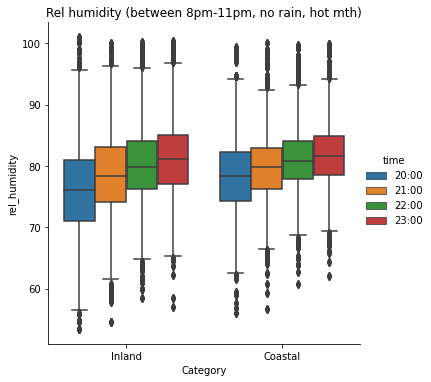

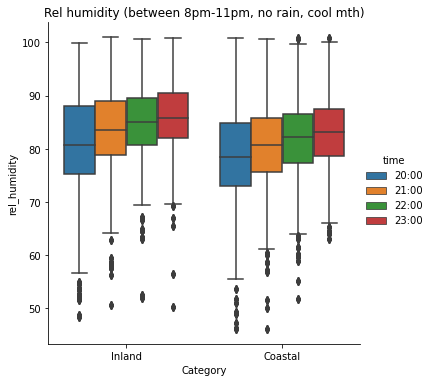

In [730]:
ax1 = sns.catplot(data = df_eve_all_hot_long, hue="time", x="Category", y="rel_humidity", kind="box", legend=True)
plt.title("Rel humidity (between 8pm-11pm, no rain, hot mth)")
ax2 = sns.catplot(data = df_eve_all_cool_long, hue="time", x="Category", y="rel_humidity", kind="box", legend=True)
plt.title("Rel humidity (between 8pm-11pm, no rain, cool mth)")

Text(0.5, 1.0, 'Wind speed (between 8pm-11pm, no rain, cool mth)')

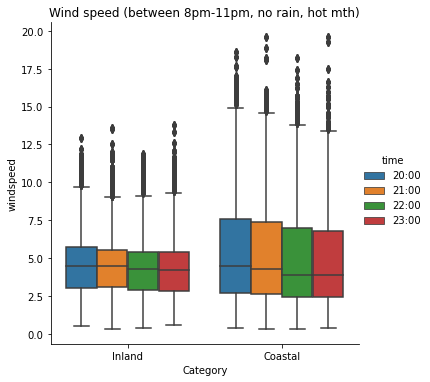

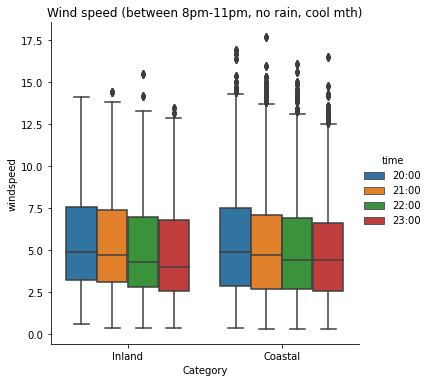

In [731]:
ax1 = sns.catplot(data = df_eve_all_hot_long, hue="time", x="Category", y="windspeed", kind="box", legend=True)
plt.title("Wind speed (between 8pm-11pm, no rain, hot mth)")
ax2 = sns.catplot(data = df_eve_all_cool_long, hue="time", x="Category", y="windspeed", kind="box", legend=True)
plt.title("Wind speed (between 8pm-11pm, no rain, cool mth)")

### 12am to 6am, exclude rainy days 

Text(0.5, 1.0, 'Compare inland stations (evening)')

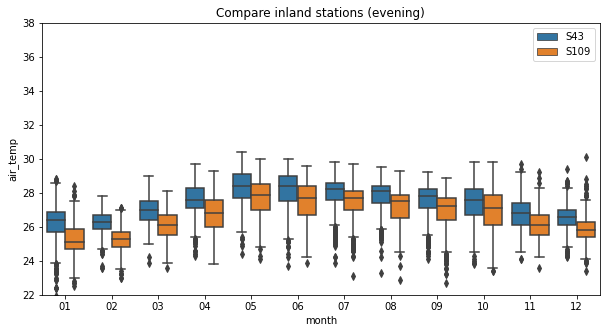

In [460]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_night_inland, hue="station_id", x="month", y="air_temp")
ax.set_ylim(22, 38)
plt.legend(loc="upper right")
plt.title("Compare inland stations (evening)")

Text(0.5, 1.0, 'Compare inland stations (evening)')

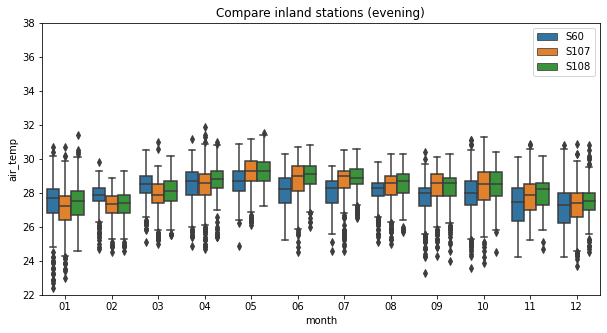

In [461]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_night_coastal, hue="station_id", x="month", y="air_temp")
ax.set_ylim(22, 38)
plt.legend(loc="upper right")
plt.title("Compare inland stations (evening)")

#### Check Normality

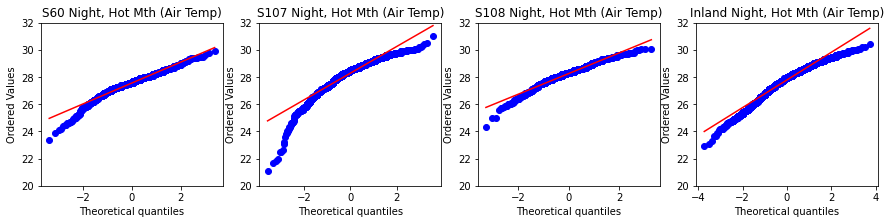

In [69]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharex= True, sharey= True, figsize=(15,3))
ax1 = plt.subplot(141)
ax1 = stats.probplot(df_night_S60_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S60 Night, Hot Mth (Air Temp)")
plt.ylim(20,32)
ax2 = plt.subplot(142)
ax2 = stats.probplot(df_night_S107_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S107 Night, Hot Mth (Air Temp)")
plt.ylim(20,32)
ax3 = plt.subplot(143)
ax3 = stats.probplot(df_night_S108_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S108 Night, Hot Mth (Air Temp)")
plt.ylim(20,32)
ax4 = plt.subplot(144)
ax4 = stats.probplot(df_night_inland_hot["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("Inland Night, Hot Mth (Air Temp)")
plt.ylim(20,32)
plt.show()

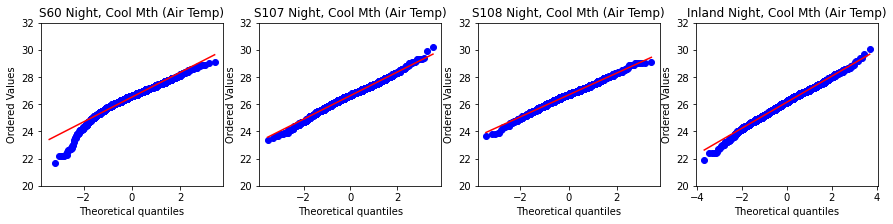

In [70]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharex= True, sharey= True, figsize=(15,3))
ax1 = plt.subplot(141)
ax1 = stats.probplot(df_night_S60_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S60 Night, Cool Mth (Air Temp)")
plt.ylim(20,32)
ax2 = plt.subplot(142)
ax2 = stats.probplot(df_night_S107_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S107 Night, Cool Mth (Air Temp)")
plt.ylim(20,32)
ax3 = plt.subplot(143)
ax3 = stats.probplot(df_night_S108_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("S108 Night, Cool Mth (Air Temp)")
plt.ylim(20,32)
ax4 = plt.subplot(144)
ax4 = stats.probplot(df_night_inland_cool["air_temp"], dist="norm", plot=pylab)
plt.gca().set_title("Inland Night, Cool Mth (Air Temp)")
plt.ylim(20,32)
plt.show()

#### Check stats

In [788]:
df_night_coastal_hot["location"] = df_night_coastal_hot["station_id"]
df_night_inland_hot["location"] = df_night_inland_hot["Category"]
df_night_hot = pd.concat([df_night_coastal_hot, df_night_inland_hot])

<ipython-input-788-5e4bbe4edb33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_night_coastal_hot["location"] = df_night_coastal_hot["station_id"]
<ipython-input-788-5e4bbe4edb33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_night_inland_hot["location"] = df_night_inland_hot["Category"]


In [793]:
round(df_night_hot.groupby("location").air_temp.describe(percentiles=quant),2)

,count,mean,std,min,10%,25%,50%,75%,90%,max
location,,,,,,,,,,
Inland,7101.0,27.79,1.04,22.9,26.3,27.2,28.0,28.5,29.0,30.4
S107,3782.0,28.28,1.02,21.1,27.0,27.8,28.5,29.0,29.4,31.0
S108,1351.0,28.26,0.77,24.3,27.3,27.8,28.3,28.7,29.2,30.1
S60,1980.0,27.57,0.78,23.4,26.6,27.2,27.6,28.0,28.5,29.9


In [791]:
df_night_coastal_cool["location"] = df_night_coastal_cool["station_id"]
df_night_inland_cool["location"] = df_night_inland_cool["Category"]
df_night_cool = pd.concat([df_night_coastal_cool, df_night_inland_cool])

<ipython-input-791-b0f4b471b529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_night_coastal_cool["location"] = df_night_coastal_cool["station_id"]
<ipython-input-791-b0f4b471b529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_night_inland_cool["location"] = df_night_inland_cool["Category"]


In [792]:
round(df_night_cool.groupby("location").air_temp.describe(percentiles=quant),2)

,count,mean,std,min,10%,25%,50%,75%,90%,max
location,,,,,,,,,,
Inland,5967.0,26.16,0.96,21.9,24.9,25.5,26.2,26.8,27.3,30.1
S107,3489.0,26.63,0.87,23.4,25.5,26.1,26.7,27.2,27.7,30.2
S108,2265.0,26.69,0.81,23.7,25.6,26.2,26.7,27.2,27.7,29.1
S60,2319.0,26.53,0.93,19.1,25.4,26.1,26.6,27.1,27.6,29.1


#### Plot distribution

Text(0.5, 1.0, 'S60 vs inland (between 12am-6am, no rain, hot mth)')

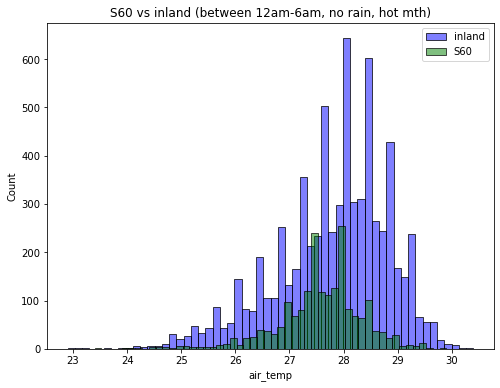

In [697]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_night_inland_hot["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_night_S60_hot["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S60"])
plt.title("S60 vs inland (between 12am-6am, no rain, hot mth)")

Text(0.5, 1.0, 'S107 vs inland (between 12am-6am, no rain, hot mth)')

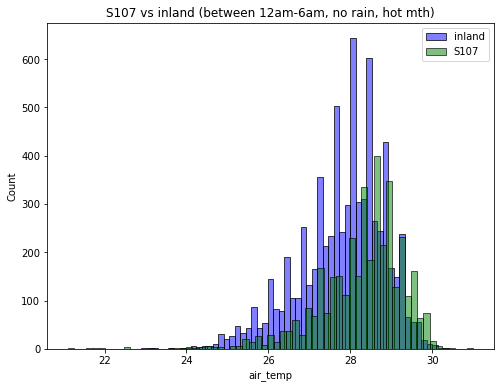

In [698]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_night_inland_hot["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_night_S107_hot["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S107"])
plt.title("S107 vs inland (between 12am-6am, no rain, hot mth)")

Text(0.5, 1.0, 'S108 vs inland (between 12am-6am, no rain, hot mth)')

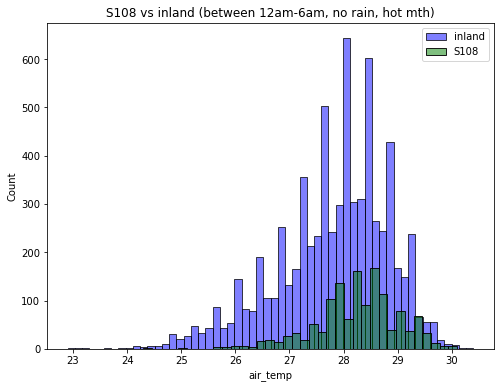

In [699]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_night_inland_hot["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_night_S108_hot["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S108"])
plt.title("S108 vs inland (between 12am-6am, no rain, hot mth)")

Text(0.5, 1.0, 'S60 vs inland (between 12am-6am, no rain, cool mth)')

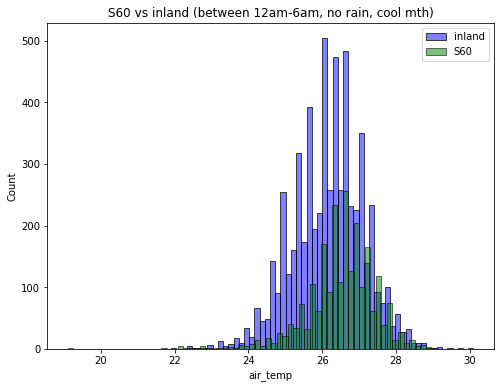

In [700]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_night_inland_cool["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_night_S60_cool["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S60"])
plt.title("S60 vs inland (between 12am-6am, no rain, cool mth)")

Text(0.5, 1.0, 'S107 vs inland (between 12am-6am, no rain, cool mth)')

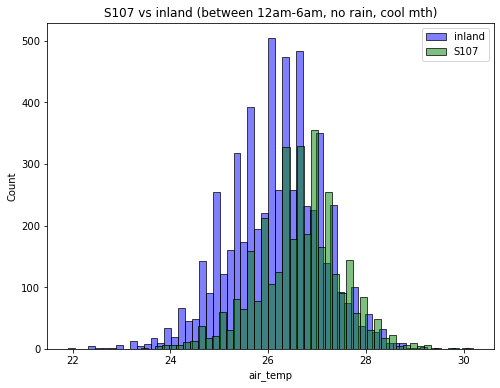

In [701]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_night_inland_cool["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_night_S107_cool["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S107"])
plt.title("S107 vs inland (between 12am-6am, no rain, cool mth)")

Text(0.5, 1.0, 'S108 vs inland (between 12am-6am, no rain, cool mth)')

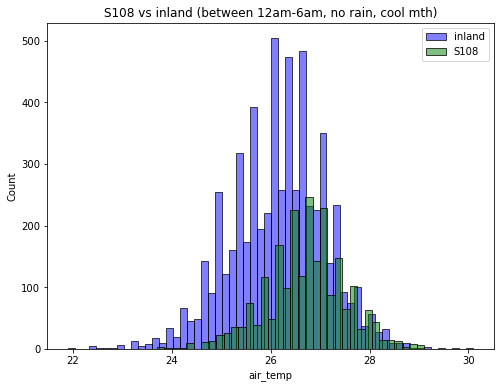

In [702]:
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_night_inland_cool["air_temp"], color="blue", legend=True, alpha=0.5)
ax2 = sns.histplot(df_night_S108_cool["air_temp"], label="inland", color="green", legend=True, alpha=0.5)
plt.legend(["inland", "S108"])
plt.title("S108 vs inland (between 12am-6am, no rain, cool mth)")

#### Stat test

In [703]:
stat, p, med, tbl = median_test(df_night_S60_hot['air_temp'], df_night_inland_hot['air_temp'])
print("Stat_S60: ", stat)
print("p_S60: ", p)
print("grand median: ", med)
print("Contingency table (Hot mth):\n   S60  inland\n", tbl)

Stat_S60:  241.2552728233687
p_S60:  2.0941266044080374e-54
grand median:  27.9
Contingency table (Hot mth):
   S60  inland
 [[ 605 3569]
 [1375 3532]]


In [704]:
stat, p, med, tbl = median_test(df_night_S107_hot['air_temp'], df_night_inland_hot['air_temp'])
print("Stat_S107: ", stat)
print("p_S107: ", p)
print("grand median: ", med)
print("Contingency table (Hot mth):\n   S107 inland\n", tbl)

Stat_S107:  518.6899071626609
p_S107:  8.157754274941702e-115
grand median:  28.1
Contingency table (Hot mth):
   S107 inland
 [[2426 2926]
 [1356 4175]]


In [705]:
stat, p, med, tbl = median_test(df_night_S108_hot['air_temp'], df_night_inland_hot['air_temp'])
print("Stat_S108: ", stat)
print("p_S108: ", p)
print("grand median: ", med)
print("Contingency table (Hot mth):\n   S108 inland\n", tbl)

Stat_S108:  158.31312361041856
p_S108:  2.6437620816710372e-36
grand median:  28.0
Contingency table (Hot mth):
   S108 inland
 [[ 874 3265]
 [ 477 3836]]


In [706]:
stat, p, med, tbl = median_test(df_night_S60_cool['air_temp'], df_night_inland_cool['air_temp'])
print("Stat_S60: ", stat)
print("p_S60: ", p)
print("grand median: ", med)
print("Contingency table (Cool mth):\n   S60  inland\n", tbl)

Stat_S60:  232.90009536897185
p_S60:  1.3896229631233666e-52
grand median:  26.3
Contingency table (Cool mth):
   S60  inland
 [[1455 2628]
 [ 864 3339]]


In [707]:
stat, p, med, tbl = median_test(df_night_S107_cool['air_temp'], df_night_inland_cool['air_temp'])
print("Stat_S107: ", stat)
print("p_S107: ", p)
print("grand median: ", med)
print("Contingency table (Cool mth):\n   S107  inland\n", tbl)

Stat_S107:  384.7161471813032
p_S107:  1.1700335568881433e-85
grand median:  26.4
Contingency table (Cool mth):
   S107  inland
 [[2122 2382]
 [1367 3585]]


In [708]:
stat, p, med, tbl = median_test(df_night_S108_cool['air_temp'], df_night_inland_cool['air_temp'])
print("Stat_S108: ", stat)
print("p_S108: ", p)
print("grand median: ", med)
print("Contingency table (Cool mth):\n   S108  inland\n", tbl)

Stat_S108:  378.0677138284329
p_S108:  3.278333204592688e-84
grand median:  26.4
Contingency table (Cool mth):
   S108  inland
 [[1447 2382]
 [ 818 3585]]


#### Check other parameters

In [732]:
df_night_all_hot_long = pd.melt(df_night_all_hot, id_vars=["time", "Category", "rel_humidity", "station_id", "windspeed", "rainfall"])
df_night_all_cool_long = pd.melt(df_night_all_cool, id_vars=["time", "Category", "rel_humidity", "station_id", "windspeed", "rainfall"])

Text(0.5, 1.0, 'Rel humidity (between 12am-6am, no rain, cool mth)')

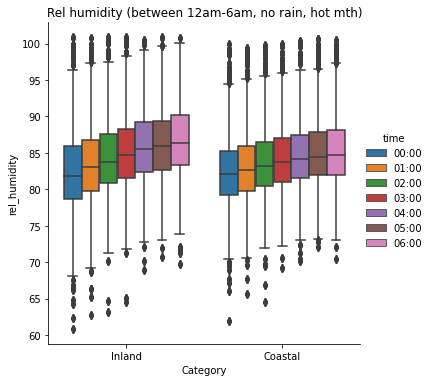

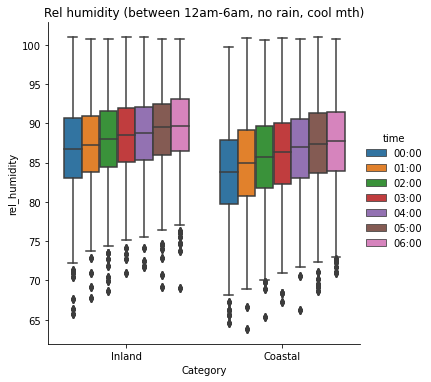

In [733]:
ax1 = sns.catplot(data = df_night_all_hot_long, hue="time", x="Category", y="rel_humidity", kind="box", legend=True)
plt.title("Rel humidity (between 12am-6am, no rain, hot mth)")
ax2 = sns.catplot(data = df_night_all_cool_long, hue="time", x="Category", y="rel_humidity", kind="box", legend=True)
plt.title("Rel humidity (between 12am-6am, no rain, cool mth)")

Text(0.5, 1.0, 'Wind speed (between 12am-6am, no rain, cool mth)')

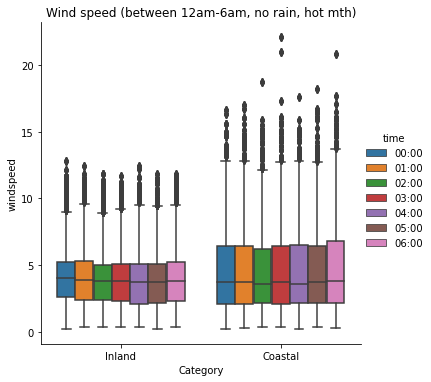

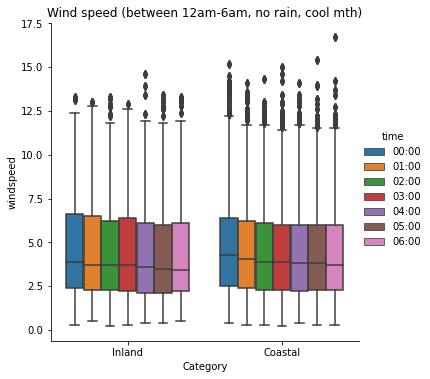

In [734]:
ax1 = sns.catplot(data = df_night_all_hot_long, hue="time", x="Category", y="windspeed", kind="box", legend=True)
plt.title("Wind speed (between 12am-6am, no rain, hot mth)")
ax2 = sns.catplot(data = df_night_all_cool_long, hue="time", x="Category", y="windspeed", kind="box", legend=True)
plt.title("Wind speed (between 12am-6am, no rain, cool mth)")

#### Other info

Text(0.5, 1.0, 'Compare coastal stations (all data)')

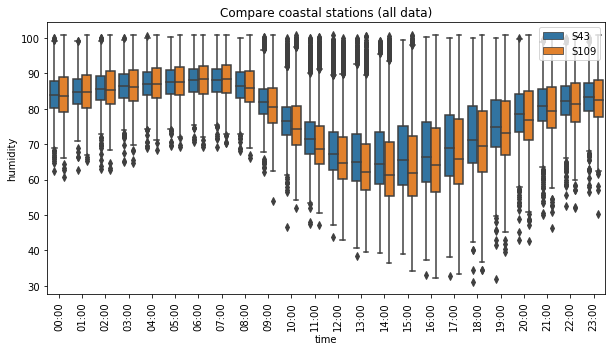

In [238]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_inland_all, hue="station_id", x="time", y="humidity")
#ax.set_ylim(22, 38)
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title("Compare inland stations (all data)")

Text(0.5, 1.0, 'Compare coastal stations (all data)')

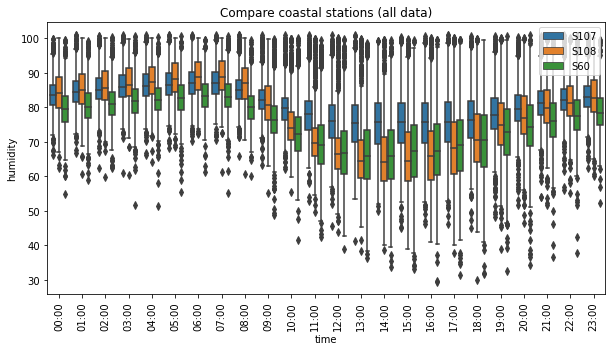

In [236]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_coastal_all, hue="station_id", x="time", y="humidity")
#ax.set_ylim(22, 38)
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title("Compare coastal stations (all data)")

Text(0.5, 1.0, 'Compare coastal stations (all data)')

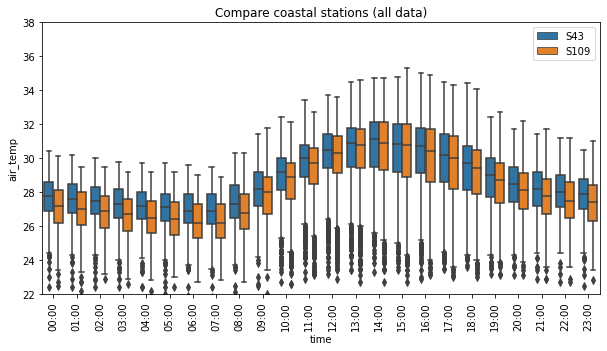

In [240]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_inland_all, hue="station_id", x="time", y="air_temp")
ax.set_ylim(22, 38)
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title("Compare inland stations (all data)")

Text(0.5, 1.0, 'Compare inland stations (all data)')

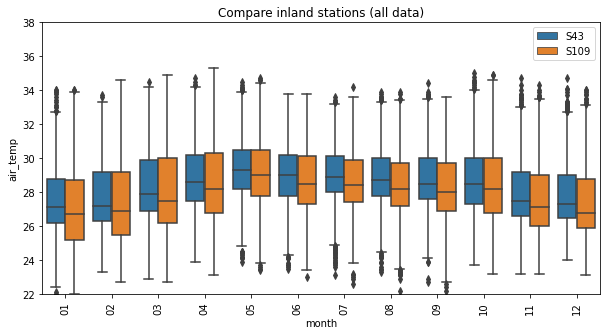

In [248]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_inland, hue="station_id", x="month", y="air_temp")
ax.set_ylim(22, 38)
plt.legend(loc="upper right")
plt.title("Compare inland stations (all data)")

Text(0.5, 1.0, 'Compare coastal stations (all data)')

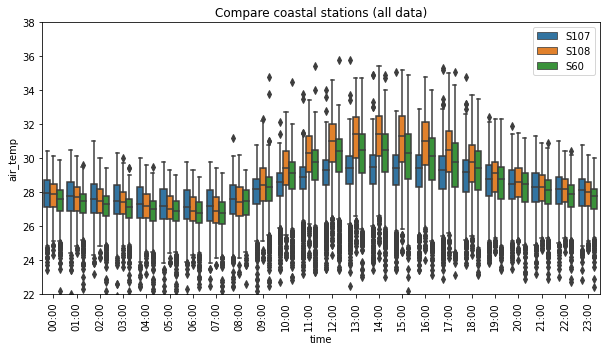

In [241]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_coastal_all, hue="station_id", x="time", y="air_temp")
ax.set_ylim(22, 38)
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title("Compare coastal stations (all data)")

Text(0.5, 1.0, 'Compare coastal stations (all data)')

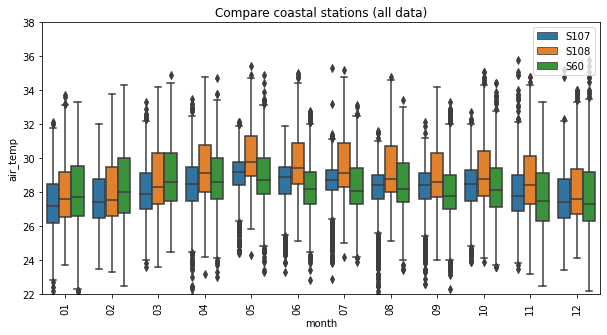

In [242]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df_coastal_all, hue="station_id", x="month", y="air_temp")
ax.set_ylim(22, 38)
plt.legend(loc="upper right")
plt.title("Compare coastal stations (all data)")